<a href="https://colab.research.google.com/github/OritPa/ML_TripAdvisor_Pipeline/blob/main/Data_Preperation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
import string
import re
import ast
warnings.filterwarnings("ignore")
%matplotlib inline
from collections import Counter
from itertools import chain
from typing import List, Tuple, Dict, Optional

# DATA PREP

### Uploading the data

In [2]:
df=pd.read_csv("tripadvisor_european_restaurants.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083396 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

In [4]:
df.describe()

,latitude,longitude,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere
count,1.067607e+06,1.067607e+06,593832.000000,593832.000000,593832.000000,986761.000000,1.031162e+06,988204.000000,988204.000000,988204.000000,988204.000000,988204.000000,988204.000000,599325.000000,604287.000000,602692.000000,261785.000000
mean,4.656718e+01,5.838040e+00,6.327081,62.023282,7.630754,4.035943,1.028890e+02,44.563415,24.653440,10.490516,4.109302,2.355306,2.954850,4.104179,4.067245,3.982897,3.933682
std,5.882611e+00,8.639410e+00,0.966734,30.538134,2.550128,0.713694,2.672415e+02,148.728179,89.850801,35.512256,15.669631,9.352756,11.030069,0.564208,0.581267,0.577605,0.555262
min,2.764031e+01,-7.121809e+01,1.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,4.190986e+01,-8.027315e-01,6.000000,39.000000,6.000000,3.500000,6.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,3.500000,3.500000
50%,4.658510e+01,5.646530e+00,7.000000,58.500000,7.000000,4.000000,2.400000e+01,7.000000,3.000000,2.000000,1.000000,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000
75%,5.140537e+01,1.223767e+01,7.000000,81.500000,7.000000,4.500000,9.300000e+01,26.000000,13.000000,6.000000,2.000000,1.000000,2.000000,4.500000,4.500000,4.500000,4.500000
max,6.994156e+01,3.336942e+01,7.000000,168.000000,15.000000,5.000000,5.240400e+04,15229.000000,9383.000000,4091.000000,2132.000000,1253.000000,1215.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
#Due to the Dataset size, we'll focus on Italy
df_italy=df[df['country']=='Italy']

In [6]:
df_italy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224763 entries, 650043 to 874805
Data columns (total 42 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   restaurant_link                    224763 non-null  object 
 1   restaurant_name                    224763 non-null  object 
 2   original_location                  224763 non-null  object 
 3   country                            224763 non-null  object 
 4   region                             224763 non-null  object 
 5   province                           202503 non-null  object 
 6   city                               32161 non-null   object 
 7   address                            224763 non-null  object 
 8   latitude                           222603 non-null  float64
 9   longitude                          222603 non-null  float64
 10  claimed                            224382 non-null  object 
 11  awards                             6548

In [7]:
df_italy.describe()

,latitude,longitude,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere
count,222603.000000,222603.000000,118266.000000,118266.000000,118266.000000,208055.000000,217549.000000,208373.000000,208373.000000,208373.000000,208373.000000,208373.000000,208373.000000,135455.000000,135832.000000,135678.000000,73041.000000
mean,43.102461,11.895241,6.289305,60.452992,8.503441,4.038021,136.466768,25.557265,13.500645,6.547753,2.471299,1.278285,1.759283,4.098254,3.978757,3.935929,3.888864
std,2.497315,2.603874,0.937286,33.557061,3.058299,0.656975,331.498014,82.624036,54.293896,19.308979,7.629538,4.171837,6.865482,0.520295,0.535933,0.544402,0.562674
min,35.128260,3.715689,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,41.154735,9.654975,6.000000,35.987500,6.000000,3.500000,8.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.500000,3.500000,3.500000
50%,43.800297,11.921374,6.000000,52.500000,7.000000,4.000000,36.000000,6.000000,3.000000,1.000000,0.000000,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000
75%,45.422239,13.670263,7.000000,81.000000,12.000000,4.500000,137.000000,21.000000,11.000000,5.000000,2.000000,1.000000,1.000000,4.500000,4.500000,4.500000,4.500000
max,47.295788,33.369423,7.000000,168.000000,15.000000,5.000000,31144.000000,6288.000000,4912.000000,1280.000000,484.000000,227.000000,932.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
df_italy.iloc[:, :20].head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets
650043,g10029467-d18338571,L'Ortal,"[""Europe"", ""Italy"", ""Friuli Venezia Giulia"", ""...",Italy,Friuli Venezia Giulia,Province of Pordenone,NaN,"Via Jacopo Ortis 15, 33090, Vito d'Asio Italy",46.228010,12.939700,Unclaimed,NaN,#1 of 1 Restaurant in Vito d'Asio,#2 of 3 places to eat in Vito d'Asio,"Cheap Eats, Italian, Northern-Italian",€,NaN,NaN,"Italian, Northern-Italian",NaN
650044,g10029467-d23200955,Osteria con Cucina Lorenzini,"[""Europe"", ""Italy"", ""Friuli Venezia Giulia"", ""...",Italy,Friuli Venezia Giulia,Province of Pordenone,NaN,"Via Chiamp, 18, 33090, Vito d'Asio Italy",46.264570,12.953270,Unclaimed,NaN,NaN,NaN,NaN,NaN,NaN,"Breakfast, Lunch, Dinner",NaN,NaN
650045,g10029597-d6878487,Ristorante Da Renzo,"[""Europe"", ""Italy"", ""Friuli Venezia Giulia"", ""...",Italy,Friuli Venezia Giulia,Province of Pordenone,NaN,"Via Galantz 2, 33090 San Francesco, Vito d'Asi...",46.312300,12.936021,Unclaimed,"Travellers' Choice, Certificate of Excellence ...",#1 of 1 Restaurant in San Francesco,#1 of 1 places to eat in San Francesco,"Cheap Eats, Italian, Vegetarian Friendly",€,NaN,"Lunch, Dinner, Breakfast",Italian,Vegetarian Friendly
650046,g10038815-d14177798,Pizza Point,"[""Europe"", ""Italy"", ""Trentino-Alto Adige"", ""Pr...",Italy,Trentino-Alto Adige,Province of South Tyrol,NaN,"Via del Borgo 4B, 39030 Valdaora di Sopra, Val...",46.758360,12.040560,Unclaimed,NaN,#1 of 1 Restaurant in Valdaora di Sopra,#1 of 1 places to eat in Valdaora di Sopra,"Cheap Eats, Pizza",€,NaN,NaN,Pizza,NaN
650047,g10045458-d12940567,Pizzeria Snoopy 2,"[""Europe"", ""Italy"", ""Emilia-Romagna"", ""Provinc...",Italy,Emilia-Romagna,Province of Bologna,NaN,"Piazza Liberta' 14, 40060 Toscanella, Dozza Italy",44.383064,11.639176,Unclaimed,NaN,#5 of 5 Restaurants in Toscanella,#6 of 7 places to eat in Toscanella,"Cheap Eats, Italian, Pizza",€,€5-€10,NaN,"Italian, Pizza",NaN


In [9]:
df_italy.iloc[:, -20:].head()

,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,default_language,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
650043,N,N,NaN,NaN,NaN,NaN,5.0,5.0,All languages,5.0,4.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
650044,N,N,"{""Mon"": [""08:00-19:00""], ""Tue"": [""08:00-19:00""...",7.0,77.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650045,N,N,"{""Mon"": [""07:00-22:00""], ""Tue"": [""07:00-22:00""...",7.0,105.0,7.0,4.5,65.0,English,3.0,2.0,1.0,0.0,0.0,0.0,4.5,4.0,4.5,NaN,NaN
650046,N,N,NaN,NaN,NaN,NaN,5.0,4.0,All languages,4.0,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
650047,N,N,NaN,NaN,NaN,NaN,3.0,13.0,All languages,13.0,6.0,1.0,1.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN


In [10]:
#Quick Check % of nulls
(df_italy.isnull().sum()/len(df_italy)).sort_values(ascending=False)

,0
keywords,0.975236
city,0.856912
price_range,0.716332
awards,0.708635
features,0.687840
atmosphere,0.675031
special_diets,0.641364
open_days_per_week,0.473819
original_open_hours,0.473819
working_shifts_per_week,0.473819


In [11]:
#Columns with more than 40%
cols_with_nulls = df_italy.columns[df_italy.isnull().sum() / len(df_italy) > 0.4]
print(cols_with_nulls)

Index(['city', 'awards', 'price_range', 'meals', 'special_diets', 'features',
       'original_open_hours', 'open_days_per_week', 'open_hours_per_week',
       'working_shifts_per_week', 'atmosphere', 'keywords'],
      dtype='object')


##Helper functions

In [12]:
def remove_punctuation_no_spaces(text):
    # Check if the input is a missing value (pd.NA)
    if pd.isna(text):
        return pd.NA  # Return the missing value marker if it is NaN/NA

    # If it's a string, perform the cleanup
    translator = str.maketrans('', '', string.punctuation + ' ')
    return text.translate(translator)

In [13]:
def remove_punctuation_and_spaces(text):
    # Check for missing value using pd.isna
    if pd.isna(text):
        return pd.NA # Explicitly return the missing value

    # Ensure it's treated as a string before applying regex

    text = str(text)

    # Replace punctuation with space, then collapse multiple spaces
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text


In [14]:
#Change Y/N to 1/0
def yn_to_bool(x):

    if pd.isna(x):
        return np.nan
    x = str(x).strip().upper()
    if x == "Y": return 1
    if x == "N": return 0
    return np.nan

In [15]:
# Relevant to column 'claimed'
def to_bool_from_unclaimed(x):
    # "Unclaimed" -> 0, anything else (e.g., "Claimed") -> 1; NaN -> 0
    if pd.isna(x):
        return 0
    x = str(x).strip().lower()
    return 0 if x == "unclaimed" else 1

In [16]:
# helper to split & clean
def _to_list(x, delimiter=",", lowercase=True, strip_space=True):
    if pd.isna(x):
        return []
    if isinstance(x, list):
        vals = x
    else:
        vals = str(x).split(delimiter)
    if strip_space:
        vals = [s.strip() for s in vals]
    if lowercase:
        vals = [s.lower() for s in vals]
    return [s for s in vals if s]


In [17]:
# Creates Top-N + _other dummy columns for stringed-list columns
def topn_get_dummies_with_other(df, col, top_n=5, delimiter=",", lowercase=True):
    # convert each cell to cleaned list
    lists = df[col].apply(lambda x: _to_list(x, delimiter, lowercase))
    # global frequency
    all_items = Counter(chain.from_iterable(lists))
    top_labels = [lab for lab, _ in all_items.most_common(top_n)]
    top_set = set(top_labels)

    out = pd.DataFrame(index=df.index)
    for lab in top_labels:
        out[f"{col}__{lab}"] = lists.apply(lambda L: int(lab in L))
    # one flag for “other”
    out[f"{col}__other"] = lists.apply(lambda L: int(any(x not in top_set for x in L)))
    return out, top_labels, dict(all_items)


#Columns Analysis and Basic Prep

###restaurant_link

In [18]:
df_italy['restaurant_link'].nunique()

224763

In [19]:
# Basic treatment for each column- remove punctuation and convert to string
df_italy['restaurant_link']= df_italy['restaurant_link'].astype('string').apply(remove_punctuation_no_spaces).astype('string')


###restaurant_name

In [20]:
df_italy['restaurant_name'].nunique()

186958

In [21]:
df_italy['restaurant_name'].value_counts().head()

,count
restaurant_name,
McDonald's,436
Burger King,211
La Piadineria,200
Old Wild West,182
La Piazzetta,122


In [22]:
#Quick check if the restaurants' names repeat themselves- will be used later in feature enginerring
dup_rows = df_italy[
    df_italy.groupby('restaurant_name')['restaurant_name'].transform('size') > 1
]

In [23]:
# Basic treatment for each column- remove punctuation and convert to string
df_italy['restaurant_name']= df_italy['restaurant_name'].astype('string').apply(remove_punctuation_no_spaces).astype('string')


In [24]:
dup_rows['restaurant_name'].value_counts()

,count
restaurant_name,
McDonald's,436
Burger King,211
La Piadineria,200
Old Wild West,182
La Piazzetta,122
...,...
Il Paradiso dei Golosi,2
Hotel Europa,2
Da Filippo,2


In [25]:
dup_rows['restaurant_name'].nunique()

14386

##Region related columns

###original_location

In [26]:
df_italy['original_location'].value_counts().head()

,count
original_location,
"[""Europe"", ""Italy"", ""Lazio"", ""Rome""]",12603
"[""Europe"", ""Italy"", ""Lombardy"", ""Milan""]",8382
"[""Europe"", ""Italy"", ""Piedmont"", ""Province of Turin"", ""Turin""]",3783
"[""Europe"", ""Italy"", ""Campania"", ""Province of Naples"", ""Naples""]",3330
"[""Europe"", ""Italy"", ""Tuscany"", ""Province of Florence"", ""Florence""]",2680


In [27]:
df_italy['original_location'].nunique()

11232

In [28]:
#Transform Stringified List 'original_location' to list - will be helpful to fill nulls in city
df_italy['original_location'] = df_italy['original_location'].apply(ast.literal_eval)

###province

In [29]:
df_italy['province'].value_counts()

,count
province,
Province of Naples,8962
Province of Turin,7846
Italian Riviera,7140
Province of Rome,5559
Province of Florence,4657
...,...
Courmayeur,3
Brusson,2
Torgnon,1


In [30]:
df_italy['province'].nunique()

121

In [31]:
df_italy['province'].isnull().sum()/len(df_italy)

np.float64(0.09903765299448752)

In [32]:
#In case of missing, fill with original_location section(section before last when province is mentioned)
mask = df_italy['province'].isna()

df_italy.loc[mask, 'province'] = df_italy.loc[mask, 'original_location'].apply(
    lambda x: x[-2] if isinstance(x, list) and len(x) >= 2 and 'province' in x[-2].lower() else None
)


In [33]:
df_italy['province'].isnull().sum()/len(df_italy)
#Did not make a difference

np.float64(0.09903765299448752)

In [34]:
df_italy['province_before_grouping']=df_italy['province'].astype('string')

In [35]:
# what is the relationship with region (higher in hierarchy)
province_counts = (
        df_italy.groupby(["region", "province"])
          .size().sort_values(ascending=False)
    )

In [36]:
province_counts.head()

,,0
region,province,
Campania,Province of Naples,8962
Piedmont,Province of Turin,7846
Liguria,Italian Riviera,7140
Lazio,Province of Rome,5559
Tuscany,Province of Florence,4657


In [37]:
TOP_N_PROVINCES_PER_REGION = 1  # keep the top N provinces within each region

# Work on a copy; normalize types & fill missing
df_italy = df_italy.copy()
df_italy['region'] = df_italy['region'].astype(str).fillna('UnknownRegion')
df_italy['province']   = df_italy['province'].astype(str).fillna('UnknownProvince')

# 1) Count province occurrences *within each region*
counts = (
    df_italy.groupby(['region', 'province'])
            .size()
            .reset_index(name='cnt')
)

# 2) Rank provinces by frequency per region (break ties by province name for determinism)
counts = (
    counts.sort_values(['region', 'cnt', 'province'], ascending=[True, False, True])
          .assign(rank=lambda d: d.groupby('region').cumcount() + 1)
)

# 3) Mark “kept” provinces: top N per region (handles regions with < N provinces naturally)
counts['keep'] = counts['rank'] <= TOP_N_PROVINCES_PER_REGION

# 4) Merge keep flags back to the original rows
df_italy = df_italy.merge(
    counts[['region', 'province', 'keep']],
    on=['region', 'province'],
    how='left'
)

# 5) Encode: keep top-N provinces; collapse the rest into "other_province_<region>"
df_italy['province_encoded'] = np.where(
    df_italy['keep'].fillna(False),
    df_italy['province'].apply(remove_punctuation_no_spaces),
    'other_province_' + df_italy['region'].apply(remove_punctuation_no_spaces)
)

# (Optional) Inspect cardinality/coverage
original_cardinality = df_italy['province'].nunique()
kept_cardinality     = counts.loc[counts['keep'], 'province'].nunique()
new_cardinality      = df_italy['province_encoded'].nunique()

print(f"Original province cardinality: {original_cardinality}")
print(f"Number of provinces kept (across all regions): {kept_cardinality}")
print(f"New encoded province cardinality: {new_cardinality}")

#
print(
     df_italy.groupby(['region', 'province_encoded'])
             .size()
             .groupby(level=0)
             .nlargest(2)  # peek at top few per region
 )


Original province cardinality: 122
Number of provinces kept (across all regions): 18
New encoded province cardinality: 38
region                 region                 province_encoded                  
Abruzzo                Abruzzo                other_province_Abruzzo                 4076
                                              ProvinceofChieti                       1462
Basilicata             Basilicata             ProvinceofPotenza                       932
                                              other_province_Basilicata               772
Calabria               Calabria               other_province_Calabria                3614
                                              ProvinceofCosenza                      2413
Campania               Campania               ProvinceofNaples                       8962
                                              other_province_Campania                8607
Emilia-Romagna         Emilia-Romagna         other_province_EmiliaRomagna   

In [38]:
df_italy['province']=df_italy['province_encoded'].astype('string')

In [39]:
##Drop helper columns
df_italy=df_italy.drop(columns=['keep','province_encoded'])

###city

In [40]:
df_italy['city'].value_counts()

,count
city,
Rome,12603
Milan,8382
Genoa,2131
Como,527
Sanremo,368
...,...
Pollara,1
Biassa,1
Onno,1


In [41]:
df_italy['city'].nunique()

375

In [42]:
df_italy['city'].isnull().sum()/len(df_italy)

np.float64(0.8569115023380183)

In [43]:
#Fill nulls based on original_location (last position)
mask = df_italy['city'].isna()
df_italy.loc[mask, 'city'] = df_italy.loc[mask, 'original_location'].apply(
    lambda x: x[-1] if isinstance(x, list) and x else None
)

In [44]:
df_italy['city'].isnull().sum()/len(df_italy)

np.float64(0.0)

In [45]:
df_italy['city'].nunique()

10960

In [46]:
#Save a copy of city before grouping. Will be used in feature engineering
df_italy['city_before_grouping']=df_italy['city'].astype('string')

In [47]:
df_italy.groupby('region')['city'].nunique().sort_values(ascending=False)

,city
region,
Lombardy,1776
Piedmont,1247
Veneto,932
Tuscany,854
Emilia-Romagna,801
Campania,694
Sicily,551
Lazio,525
Trentino-Alto Adige,498


In [48]:
TOP_N_CITIES_PER_REGION = 1  # keep the top N cities within each region

# Work on a copy; normalize types & fill missing
df_italy = df_italy.copy()
df_italy['region'] = df_italy['region'].astype(str).fillna('UnknownRegion')
df_italy['city']   = df_italy['city'].astype(str).fillna('UnknownCity')

# 1) Count city occurrences *within each region*
counts = (
    df_italy.groupby(['region', 'city'])
            .size()
            .reset_index(name='cnt')
)

# 2) Rank cities by frequency per region (break ties by city name for determinism)
counts = (
    counts.sort_values(['region', 'cnt', 'city'], ascending=[True, False, True])
          .assign(rank=lambda d: d.groupby('region').cumcount() + 1)
)

# 3) Mark “kept” cities: top N per region (handles regions with < N cities naturally)
counts['keep'] = counts['rank'] <= TOP_N_CITIES_PER_REGION

# 4) Merge keep flags back to the original rows
df_italy = df_italy.merge(
    counts[['region', 'city', 'keep']],
    on=['region', 'city'],
    how='left'
)

# 5) Encode: keep top-N cities; collapse the rest into "other_city_<region>"
df_italy['city_encoded'] = np.where(
    df_italy['keep'].fillna(False),
    df_italy['city'].apply(remove_punctuation_no_spaces),
    'other_city_' + df_italy['region'].apply(remove_punctuation_no_spaces)
)

# (Optional) Inspect cardinality/coverage
original_cardinality = df_italy['city'].nunique()
kept_cardinality     = counts.loc[counts['keep'], 'city'].nunique()
new_cardinality      = df_italy['city_encoded'].nunique()

print(f"Original city cardinality: {original_cardinality}")
print(f"Number of cities kept (across all regions): {kept_cardinality}")
print(f"New encoded city cardinality: {new_cardinality}")

# (Optional) sanity check per region
print(
     df_italy.groupby(['region', 'city_encoded'])
             .size()
             .groupby(level=0)
             .nlargest(8)  # peek at top few per region
 )


Original city cardinality: 10960
Number of cities kept (across all regions): 20
New encoded city cardinality: 40
region                 region                 city_encoded                  
Abruzzo                Abruzzo                other_city_Abruzzo                 4895
                                              Pescara                             643
Basilicata             Basilicata             other_city_Basilicata              1337
                                              Matera                              367
Calabria               Calabria               other_city_Calabria                5609
                                              ReggioCalabria                      418
Campania               Campania               other_city_Campania               14239
                                              Naples                             3330
Emilia-Romagna         Emilia-Romagna         other_city_EmiliaRomagna          15685
                                    

In [49]:
df_italy['city']=df_italy['city_encoded'].astype('string')

In [50]:
df_italy['city'].value_counts()

,count
city,
other_city_Lombardy,24715
other_city_Veneto,16284
other_city_Tuscany,16181
other_city_EmiliaRomagna,15685
other_city_Campania,14239
other_city_Sicily,13860
Rome,12603
other_city_Piedmont,12547
other_city_Puglia,11354


In [51]:
#Drop helper columns
df_italy=df_italy.drop(columns=['keep','city_encoded'])

###region

In [52]:
df_italy['region'].value_counts()

,count
region,
Lombardy,33097
Lazio,23831
Tuscany,18861
Veneto,17823
Campania,17569
Emilia-Romagna,17568
Piedmont,16330
Sicily,15701
Puglia,12452


In [53]:
df_italy['region'].nunique()

20

In [54]:
df_italy['region'].isnull().sum()/len(df_italy)

np.float64(0.0)

In [55]:
#Remove  punctuation
df_italy['region'] = df_italy['region'].astype('string').apply(remove_punctuation_and_spaces).astype('string')

In [56]:
#Save a copy of city before grouping. Will be used in feature engineering
df_italy['region_before_grouping']=df_italy['region'].astype('string')

In [57]:
_NORTH = {
    "Valle d Aosta", "Piedmont", "Liguria", "Lombardy",
    "Trentino Alto Adige", "Veneto", "Friuli Venezia Giulia", "Emilia Romagna"
}
_CENTER = {"Tuscany", "Lazio", "Umbria", "Marche", "Abruzzo"}
_SOUTH = {"Campania", "Molise", "Puglia", "Basilicata", "Calabria"}
_ISLANDS = {"Sicily", "Sardinia"}

def region_to_macro(region: str) -> str | None:
    """
    Map region to one of: 'North', 'Center', 'South', 'Islands'.
    Returns None if region is missing or unknown.
    """
    if region is None or (isinstance(region, float) and np.isnan(region)):
        return None
    r = region
    if r in _NORTH:
        return "North"
    if r in _CENTER:
        return "Center"
    if r in _SOUTH:
        return "South"
    if r in _ISLANDS:
        return "Islands"
    return None


In [58]:
df_italy['region'] = df_italy['region'].apply(region_to_macro).astype('string')

In [59]:
df_italy["region"].value_counts()

,count
region,
North,105625
Center,57752
South,38766
Islands,22620


###address

In [60]:
df_italy['address'].nunique()

217160

In [61]:
df_italy['address'].value_counts().head()

,count
address,
Rome Italy,17
"Via Al Portico 71, 24050 Orio Al Serio Italy",11
"Via Crea 10, 10095, Grugliasco Italy",9
"Via San Quirico 165, 50013, Campi Bisenzio Italy",8
"Viale Dell'Oceano Pacifico 83, 00144 Rome Italy",8


In [62]:
#Due to high Cardinality will only receive basic prep and will be dropped later
df_italy['address'] = df_italy['address'].astype(str).apply(remove_punctuation_and_spaces).astype('string')

###latitude

In [63]:
df_italy['latitude'].nunique()

191068

In [64]:
#Check nulls
df_italy['latitude'].isnull().sum()/len(df_italy)

np.float64(0.009610122662537874)

Will be used for feature engineering

###longitude

In [65]:
df_italy['longitude'].nunique()

207272

In [66]:
#Check nulls
df_italy['longitude'].isnull().sum()/len(df_italy)

np.float64(0.009610122662537874)

Will be used for feature engineering

###claimed

In [67]:
df_italy['claimed'].value_counts()

,count
claimed,
Unclaimed,112624
Claimed,111758


In [68]:
#Check nulls
df_italy['claimed'].isnull().sum()/len(df_italy)

np.float64(0.001695118858530986)

In [69]:
#Turn claimed/unclaimed to Boolean
df_italy['claimed']=df_italy['claimed'].apply(to_bool_from_unclaimed)

###awards

In [70]:
df_italy['awards'].value_counts()

,count
awards,
"Travellers' Choice, Certificate of Excellence 2020",4608
Certificate of Excellence 2017,3840
"Travellers' Choice, Certificate of Excellence 2020, Certificate of Excellence 2019",3505
"Travellers' Choice, Certificate of Excellence 2020, Certificate of Excellence 2019, Certificate of Excellence 2018, Certificate of Excellence 2017, Certificate of Excellence 2016",2622
"Travellers' Choice, Certificate of Excellence 2020, Certificate of Excellence 2019, Certificate of Excellence 2018",2558
...,...
"Michelin 2021 for One Michelin Star: High quality cooking, worth a stop!, Michelin 2021 for Simple restaurant",1
"Michelin 2021 for The Michelin Plate: Good cooking, Michelin 2021 for Luxurious restaurant",1
"Travellers' Choice, Certificate of Excellence 2020, Certificate of Excellence 2019, Certificate of Excellence 2017, Certificate of Excellence 2016, Certificate of Excellence 2011",1


In [71]:
df_italy['awards'].nunique()

634

In [72]:
df_italy['awards'].isnull().sum()/len(df_italy)

np.float64(0.708635318090611)

High cardinality, hard to standardize. The strategy is to switch to 0/1 but beforehand flag Michelin

In [73]:
# Since awards will be changed extract the most prestigious award
df_italy['is_michelin'] = df_italy['awards'].str.contains('Michelin', na=False).astype(int)

In [74]:
df_italy['is_michelin'].value_counts()

,count
is_michelin,
0,222771
1,1992


In [75]:
#Change column definition- If null 0 else 1
df_italy['awards'] = np.where(df_italy['awards'].isna(), 0, 1)

###popularity_detailed

In [76]:
df_italy['popularity_detailed'].value_counts()

,count
popularity_detailed,
#5951 of 6682 Restaurants in Milan,89
#9123 of 10232 Restaurants in Rome,84
#2637 of 2953 Restaurants in Turin,33
#2333 of 2653 Restaurants in Naples,29
#1513 of 1708 Restaurants in Genoa,20
...,...
#61 of 682 Restaurants in Rimini,1
#489 of 682 Restaurants in Rimini,1
#510 of 682 Restaurants in Rimini,1


In [77]:
df_italy['popularity_detailed'].nunique()

207399

In [78]:
df_italy['popularity_detailed'].isnull().sum()/len(df_italy)

np.float64(0.07307252528218612)

Due to high cardinality, will be later extracted only for rank and num of restaurants per location


In [79]:
# Remove punctuation and change type to string
df_italy['popularity_detailed'] = df_italy['popularity_detailed'].astype('string').apply(remove_punctuation_and_spaces).astype('string')

##popularity_generic

In [80]:
#Similiar to popularity_detailed. Doesn't add new information.

In [81]:
df_italy['popularity_detailed'].value_counts()

,count
popularity_detailed,
5951 of 6682 Restaurants in Milan,89
9123 of 10232 Restaurants in Rome,84
2637 of 2953 Restaurants in Turin,33
2333 of 2653 Restaurants in Naples,29
1513 of 1708 Restaurants in Genoa,20
...,...
51 of 80 Restaurants in San Lazzaro di Savena,1
6 of 80 Restaurants in San Lazzaro di Savena,1
59 of 80 Restaurants in San Lazzaro di Savena,1


In [82]:
df_italy['awards'].isnull().sum()/len(df_italy)

np.float64(0.0)

In [83]:
# Remove punctuation and change type to string
df_italy['popularity_generic']= df_italy['popularity_generic'].astype('string').apply(remove_punctuation_and_spaces).astype('string')

##Stringed- list Columns

The strategy is extract top5 values from each column + other column as get_dummies type of new columns. For meals, since there is little cardinality, a simple get_dummies.

####top_tags

In [84]:
df_italy['top_tags'].value_counts()

,count
top_tags,
"Mid-range, Italian, Seafood, Mediterranean",12695
"Mid-range, Italian, Pizza, Seafood",11372
"Mid-range, Italian",10040
Italian,9618
"Cheap Eats, Italian",7535
...,...
"Mid-range, Japanese, Asian, Central Asian",1
"Italian, American, Street Food, Vegetarian Friendly",1
"Dine With a Local Chef, Italian, Mediterranean",1


In [85]:
df_italy['top_tags'].nunique()

9059

In [86]:
df_italy['top_tags'].isnull().sum()/len(df_italy)

np.float64(0.07801106053932365)

In [87]:
#Check values in stringed list
exploded_counts_top_tags = df_italy['top_tags'].str.split(', ').explode().str.strip().value_counts()

# reset_index() converts the cuisine name (index) into a column
exploded_counts_top_tags_df = exploded_counts_top_tags.reset_index()

# Rename the columns to 'top_tags' and 'count' for clarity
exploded_counts_top_tags_df.columns = ['top_tags', 'count']

print("\n--- Exploded top_tags Counts DataFrame ---")
print(exploded_counts_top_tags_df.head(10))


--- Exploded top_tags Counts DataFrame ---
              top_tags   count
0              Italian  161622
1            Mid-range  104891
2           Cheap Eats   60890
3                Pizza   54860
4        Mediterranean   44053
5              Seafood   41854
6  Vegetarian Friendly   28086
7                  Bar   18718
8                 Cafe   14548
9              Dessert   12872


In [88]:
tags_dummies, tags_top, tags_counts = topn_get_dummies_with_other(
    df_italy, "top_tags", top_n=6
)

In [89]:
# Remove punctuation and change type to string
df_italy['top_tags']= df_italy['top_tags'].astype('string').apply(remove_punctuation_and_spaces).astype('string')

###meals

In [90]:
df_italy['meals'].value_counts().head()

,count
meals,
"Lunch, Dinner",34614
Dinner,16808
"Lunch, Dinner, After-hours",10302
"Breakfast, Lunch, Dinner",10152
Breakfast,5601


In [91]:
df_italy['meals'].nunique()

475

In [92]:
df_italy['meals'].isnull().sum()/len(df_italy)

np.float64(0.4338925890827227)

In [93]:
# Clean and split first
df_meals_clean = df_italy["meals"].apply(lambda x: _to_list(x))
# Flatten multiple values into one string
df_meals_single = df_meals_clean.apply(lambda L: L[0] if len(L) > 0 else None)
meals_dummies = pd.get_dummies(df_meals_single, prefix="meals", dtype=int)

In [94]:
# Remove punctuation and change type to string
df_italy['meals']= df_italy['meals'].astype('string').apply(remove_punctuation_and_spaces).astype('string')

###cuisines

In [95]:
df_italy['cuisines'].value_counts().head()

,count
cuisines,
Italian,39266
"Italian, Pizza",15522
"Italian, Seafood, Mediterranean",6375
"Italian, Mediterranean",5680
Pizza,3792


In [96]:
df_italy['cuisines'].nunique()

23437

In [97]:
df_italy['cuisines'].isnull().sum()/len(df_italy)

np.float64(0.12830848493746747)

In [98]:
#Check values in stringed list
exploded_counts_cuisines = df_italy['cuisines'].str.split(', ').explode().str.strip().value_counts()

# reset_index() converts the cuisine name (index) into a column
exploded_counts_cuisines_df = exploded_counts_cuisines.reset_index()

# Rename the columns to 'cuisine' and 'count' for clarity
exploded_counts_cuisines_df.columns = ['cuisine', 'count']

print("\n--- Exploded Cuisine Counts DataFrame ---")
print(exploded_counts_cuisines_df.head(10))


--- Exploded Cuisine Counts DataFrame ---
            cuisine   count
0           Italian  160924
1     Mediterranean   58650
2             Pizza   55432
3           Seafood   42886
4               Bar   19287
5               Pub   18144
6              Cafe   15772
7  Southern-Italian   15075
8          European   12880
9          Barbecue   11682


In [99]:
#Pick top 5 values
cuisines_dummies, cuisines_top, cuisines_counts = topn_get_dummies_with_other(
    df_italy, "cuisines", top_n=5
)

In [100]:
# Remove punctuation and change type to string
df_italy['cuisines']= df_italy['cuisines'].astype('string').apply(remove_punctuation_and_spaces).astype('string')

###features

In [101]:
print(df_italy['features'].nunique())
df_italy['features'].value_counts().head(20)

13286


,count
features,
Reservations,8578
"Reservations, Seating, Table Service",3460
"Takeout, Wheelchair Accessible",2049
Takeout,1763
"Reservations, Seating, Wheelchair Accessible, Table Service",1728
"Reservations, Seating, Serves Alcohol, Table Service",1538
Wheelchair Accessible,1472
"Reservations, Seating, Wheelchair Accessible, Serves Alcohol, Table Service",1190
"Reservations, Table Service, Seating",992


In [102]:
df_italy['features'].isnull().sum()/len(df_italy)

np.float64(0.687840080440286)

In [103]:
#Check values in stringed list
exploded_counts_features = df_italy['features'].str.split(', ').explode().str.strip().value_counts()

# reset_index() converts the features name (index) into a column
exploded_counts_features_df = exploded_counts_features.reset_index()

# Rename the columns to 'features' and 'count' for clarity
exploded_counts_features_df.columns = ['features', 'count']

print("\n--- Exploded features Counts DataFrame ---")
print(exploded_counts_features_df.head(10))


--- Exploded features Counts DataFrame ---
                features  count
0           Reservations  51059
1                Seating  49579
2          Table Service  43371
3  Wheelchair Accessible  36926
4         Serves Alcohol  27017
5                Takeout  23179
6        Outdoor Seating  13664
7   Accepts Credit Cards   9565
8   Highchairs Available   9192
9               Full Bar   8030


In [104]:
features_dummies, features_top, features_counts = topn_get_dummies_with_other(
    df_italy, "features", top_n=6
)

In [105]:
# Remove punctuation and change type to string
df_italy['cuisines']= df_italy['cuisines'].astype('string').apply(remove_punctuation_and_spaces).astype('string')

Merge all new columns back into the original df

In [106]:
df_italy_enriched = pd.concat(
    [df_italy, cuisines_dummies, tags_dummies, meals_dummies, features_dummies], axis=1
)

In [107]:
df_italy=df_italy_enriched

###price_level

In [108]:
df_italy['price_level'].value_counts()

,count
price_level,
€€-€€€,104754
€,60821
€€€€,6441


In [109]:
df_italy['price_level'].isnull().sum()/len(df_italy)

np.float64(0.2346783055930024)

In [110]:
#Change to simbol ranking to ordinal
price_map = {
    '€': 1,
    '€€-€€€': 2,
    '€€€€': 3
}

# Map values and fill missing with 0
df_italy['price_level'] = df_italy['price_level'].map(price_map).fillna(0).astype(int)

###price_range

Due to high cardinality and lack of standardization, the goal is to create new price_range based on max_price. Since it has high % of nulls the transformation will occur after missing.

In [111]:
df_italy['price_range'].value_counts()

,count
price_range,
€10-€30,2221
€15-€30,1430
€5-€15,1397
€5-€20,1329
€10-€25,1299
...,...
€49-€55,1
€44-€117,1
€37-€86,1


In [112]:
# Create a min- max columns based on price_range
df_italy[['min_price', 'max_price']] = df_italy['price_range'].str.extract(r'€?(\d+)\s*-\s*€?(\d+)')
df_italy[['min_price', 'max_price']] = df_italy[['min_price', 'max_price']].apply(pd.to_numeric, errors='coerce')

In [113]:
df_italy[['price_range','min_price', 'max_price']].head(10)

,price_range,min_price,max_price
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,€5-€10,5.0,10.0
5,€4-€16,4.0,16.0
6,€12-€22,12.0,22.0
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [114]:
df_italy[['min_price', 'max_price']].describe()

,min_price,max_price
count,63113.000000,63113.000000
mean,12.631011,33.784593
std,17.719622,33.643374
min,0.000000,1.000000
25%,5.000000,17.000000
50%,10.000000,30.000000
75%,15.000000,40.000000
max,999.000000,999.000000


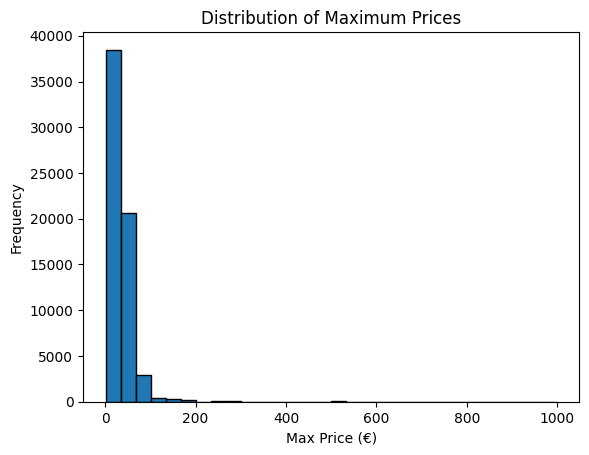

In [115]:
plt.hist(df_italy['max_price'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Maximum Prices')
plt.xlabel('Max Price (€)')
plt.ylabel('Frequency')
plt.show()

In [116]:
#An example of new price range based on max values
df_italy['price_range'] = pd.cut(
    df_italy['max_price'],
    bins=[0, 15, 30, 50, 100, float('inf')],
    labels=['0-15', '15-30', '30-50', '50-100', '>100'],
    right=False
)

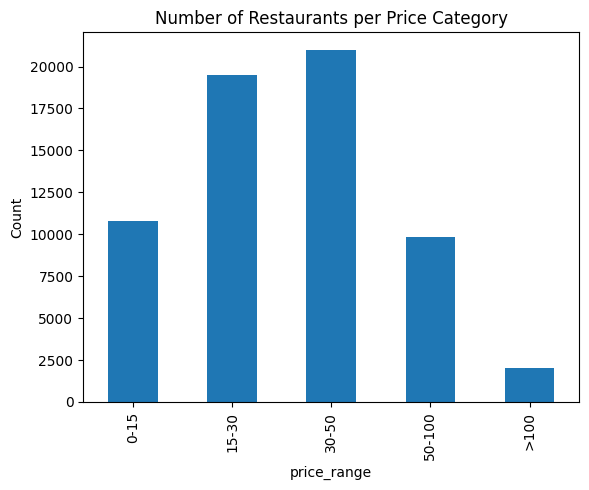

In [117]:
df_italy['price_range'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Restaurants per Price Category')
plt.ylabel('Count')
plt.show()

In [118]:
# Change type to string
df_italy['price_range']= df_italy['price_range'].astype('string')

###special_diets

In [119]:
print(df_italy['special_diets'].nunique())
df_italy['special_diets'].value_counts()

42


,count
special_diets,
Vegetarian Friendly,36739
"Vegetarian Friendly, Vegan Options, Gluten Free Options",13709
"Vegetarian Friendly, Gluten Free Options",11433
"Vegetarian Friendly, Vegan Options",11417
Gluten Free Options,4210
Vegan Options,856
"Vegetarian Friendly, Gluten Free Options, Vegan Options",665
"Gluten Free Options, Vegetarian Friendly",470
"Vegan Options, Vegetarian Friendly",352


In [120]:
df_italy['special_diets'].isnull().sum()/len(df_italy)

np.float64(0.6413644594528459)

In [121]:
df_italy['special_diets'] = df_italy['special_diets'].astype('string').apply(remove_punctuation_and_spaces).astype('string')

Due to high % of nulls and most relevant information is in further columns- will be later dropped after feature engineering

###vegetarian_friendly

In [122]:
df_italy['vegetarian_friendly'].value_counts()

,count
vegetarian_friendly,
N,149474
Y,75289


In [123]:
df_italy['vegetarian_friendly']= df_italy['vegetarian_friendly'].apply(yn_to_bool)

In [124]:
df_italy['vegetarian_friendly'].value_counts()

,count
vegetarian_friendly,
0,149474
1,75289


###vegan_options

In [125]:
df_italy['vegan_options'].value_counts()

,count
vegan_options,
N,197081
Y,27682


In [126]:
df_italy['vegan_options']= df_italy['vegan_options'].apply(yn_to_bool)

In [127]:
df_italy['vegan_options'].value_counts()

,count
vegan_options,
0,197081
1,27682


###gluten_free

In [128]:
df_italy['gluten_free'].value_counts()

,count
gluten_free,
N,193623
Y,31140


In [129]:
df_italy['gluten_free']= df_italy['gluten_free'].apply(yn_to_bool)

In [130]:
df_italy['gluten_free'].value_counts()

,count
gluten_free,
0,193623
1,31140


###original_open_hours

In [131]:
df_italy['original_open_hours'].nunique()

57621

In [132]:
df_italy['original_open_hours'].value_counts()

,count
original_open_hours,
"{""Mon"": [""00:00-23:59""], ""Tue"": [""00:00-23:59""], ""Wed"": [""00:00-23:59""], ""Thu"": [""00:00-23:59""], ""Fri"": [""00:00-23:59""], ""Sat"": [""00:00-23:59""], ""Sun"": [""00:00-23:59""]}",2386
"{""Mon"": [""12:00-15:00"", ""19:00-00:00""], ""Tue"": [""12:00-15:00"", ""19:00-00:00""], ""Wed"": [""12:00-15:00"", ""19:00-00:00""], ""Thu"": [""12:00-15:00"", ""19:00-00:00""], ""Fri"": [""12:00-15:00"", ""19:00-00:00""], ""Sat"": [""12:00-15:00"", ""19:00-00:00""], ""Sun"": [""12:00-15:00"", ""19:00-00:00""]}",473
"{""Mon"": [""12:00-15:00"", ""19:00-23:00""], ""Tue"": [""12:00-15:00"", ""19:00-23:00""], ""Wed"": [""12:00-15:00"", ""19:00-23:00""], ""Thu"": [""12:00-15:00"", ""19:00-23:00""], ""Fri"": [""12:00-15:00"", ""19:00-23:00""], ""Sat"": [""12:00-15:00"", ""19:00-23:00""], ""Sun"": [""12:00-15:00"", ""19:00-23:00""]}",466
"{""Mon"": [""07:00-00:00""], ""Tue"": [""07:00-00:00""], ""Wed"": [""07:00-00:00""], ""Thu"": [""07:00-00:00""], ""Fri"": [""07:00-00:00""], ""Sat"": [""07:00-00:00""], ""Sun"": [""07:00-00:00""]}",434
"{""Mon"": [""12:00-00:00""], ""Tue"": [""12:00-00:00""], ""Wed"": [""12:00-00:00""], ""Thu"": [""12:00-00:00""], ""Fri"": [""12:00-00:00""], ""Sat"": [""12:00-00:00""], ""Sun"": [""12:00-00:00""]}",414
...,...
"{""Mon"": [""17:00-20:00""], ""Tue"": [""11:00-14:30"", ""17:00-20:00""], ""Wed"": [""11:00-14:30"", ""17:00-20:00""], ""Thu"": [""11:00-14:30"", ""17:00-20:00""], ""Fri"": [""11:00-14:30"", ""17:00-20:00""], ""Sat"": [], ""Sun"": []}",1
"{""Mon"": [""12:00-14:30"", ""18:00-00:00""], ""Tue"": [""12:00-14:30"", ""18:00-00:00""], ""Wed"": [""12:00-14:30"", ""18:00-00:00""], ""Thu"": [""12:00-14:30"", ""18:00-00:00""], ""Fri"": [""12:00-14:30"", ""18:00-00:00""], ""Sat"": [""12:00-14:30"", ""18:00-00:00""], ""Sun"": [""12:00-14:30""]}",1
"{""Mon"": [], ""Tue"": [], ""Wed"": [], ""Thu"": [""09:00-22:30""], ""Fri"": [""09:00-22:30""], ""Sat"": [""09:00-23:30""], ""Sun"": [""09:00-22:30""]}",1


In [133]:
df_italy['original_open_hours'].isnull().sum()/len(df_italy)

np.float64(0.47381908944087775)

Messy, unstandardized, data exists in other columns and has 47% nulls- will be dropped but will be used in feature engineering

###open_days_per_week

In [134]:
print(df_italy['open_days_per_week'].nunique())
df_italy['open_days_per_week'].value_counts()

7


,count
open_days_per_week,
7.0,54707
6.0,53726
5.0,4947
3.0,1886
4.0,1364
2.0,1021
1.0,615


In [135]:
df_italy['open_days_per_week'].isnull().sum()/len(df_italy)

np.float64(0.47381908944087775)

###open_hours_per_week

In [136]:
print(df_italy['open_hours_per_week'].nunique())
df_italy['open_hours_per_week'].value_counts()

1917


,count
open_hours_per_week,
42.000000,3905
84.000000,2801
30.000000,2789
36.000000,2780
167.883333,2388
...,...
51.900000,1
74.416667,1
108.750000,1


In [137]:
df_italy['open_hours_per_week'].isnull().sum()/len(df_italy)

np.float64(0.47381908944087775)

###working_shifts_per_week

In [138]:
print(df_italy['working_shifts_per_week'].nunique())
df_italy['working_shifts_per_week'].value_counts()

15


,count
working_shifts_per_week,
7.0,36156
6.0,28100
12.0,16471
14.0,10982
11.0,7149
13.0,4172
10.0,3329
5.0,3190
8.0,2900


In [139]:
df_italy['working_shifts_per_week'].isnull().sum()/len(df_italy)

np.float64(0.47381908944087775)

###default_language

In [140]:
df_italy['default_language'].value_counts()

,count
default_language,
English,112399
All languages,95974


In [141]:
df_italy['working_shifts_per_week'].isnull().sum()/len(df_italy)

np.float64(0.47381908944087775)

In [142]:
df_italy['default_language'] = df_italy['default_language'].astype('string')

###reviews_count_in_default_language

In [143]:
df_italy['reviews_count_in_default_language'].value_counts()

,count
reviews_count_in_default_language,
1.0,40152
2.0,22566
3.0,15445
4.0,11628
5.0,9335
...,...
2862.0,1
6195.0,1
578.0,1


####Columns that are part of score and hence will be dropped: excellent,very_good, average, poor, terrible, food, service, value, atmosphere

In [144]:
print(df_italy['excellent'].nunique())
df_italy['excellent'].value_counts()

720


,count
excellent,
1.0,41973
0.0,29209
2.0,22715
3.0,15091
4.0,11277
...,...
852.0,1
1647.0,1
1293.0,1


In [145]:
print(df_italy['very_good'].nunique())
df_italy['very_good'].value_counts()

364


,count
very_good,
0.0,63257
1.0,43756
2.0,20999
3.0,13330
4.0,9381
...,...
898.0,1
325.0,1
244.0,1


In [146]:
print(df_italy['average'].nunique())
df_italy['average'].value_counts()

188


,count
average,
0.0,111764
1.0,37243
2.0,16032
3.0,9417
4.0,6216
...,...
215.0,1
203.0,1
484.0,1


In [147]:
print(df_italy['poor'].nunique())
df_italy['poor'].value_counts()

115


,count
poor,
0.0,138900
1.0,30607
2.0,12360
3.0,6903
4.0,4417
...,...
79.0,1
99.0,1
85.0,1


In [148]:
print(df_italy['terrible'].nunique())
df_italy['terrible'].value_counts()

175


,count
terrible,
0.0,131510
1.0,30997
2.0,13196
3.0,7905
4.0,5139
...,...
375.0,1
188.0,1
230.0,1


In [149]:
print(df_italy['food'].nunique())
df_italy['food'].value_counts()

9


,count
food,
4.5,49964
4.0,49303
3.5,19961
5.0,8036
3.0,5843
2.5,1734
2.0,509
1.5,97
1.0,8


In [150]:
print(df_italy['service'].nunique())
df_italy['service'].value_counts()

9


,count
service,
4.0,53532
4.5,37837
3.5,27337
3.0,8504
5.0,5512
2.5,2328
2.0,619
1.5,151
1.0,12


In [151]:
print(df_italy['value'].nunique())
df_italy['value'].value_counts()

9


,count
value,
4.0,53802
4.5,34046
3.5,29867
3.0,9637
5.0,4793
2.5,2555
2.0,726
1.5,204
1.0,48


In [152]:
print(df_italy['atmosphere'].nunique())
df_italy['atmosphere'].value_counts()

9


,count
atmosphere,
4.0,26582
4.5,17869
3.5,17442
3.0,6715
5.0,2142
2.5,1761
2.0,428
1.5,91
1.0,11


###keywords

In [153]:
print(df_italy['keywords'].nunique())
df_italy['keywords'].value_counts()

5565


,count
keywords,
"gelato, gelateria, ice cream, dark chocolate, salted caramel",2
"pasta, lampredotto, burger, sandwiches, tripe",1
"brunch, pancakes, great coffee, flat whites, hipster",1
"pizza, burrata, thin crust, fresh ingredients, from scratch",1
"garlic naan, indian food, vegetarian dishes, great taste, amazing food",1
...,...
"tortellini, house wine, wrapped in bacon, hand made, traditional trattoria",1
"brunch, sandwiches, cannoli, lovely atmosphere, cappuccino",1
"pizza, salad, tiramisu, risotto, antipasti",1


In [154]:
df_italy['keywords'].isnull().sum()/len(df_italy)

np.float64(0.9752361376205159)

#Target Components

###avg_rating

In [155]:
print(df_italy['avg_rating'].nunique())
df_italy['avg_rating'].value_counts()

9


,count
avg_rating,
4.0,69103
4.5,62994
3.5,32376
5.0,21669
3.0,13733
2.5,4538
2.0,2118
1.0,963
1.5,561


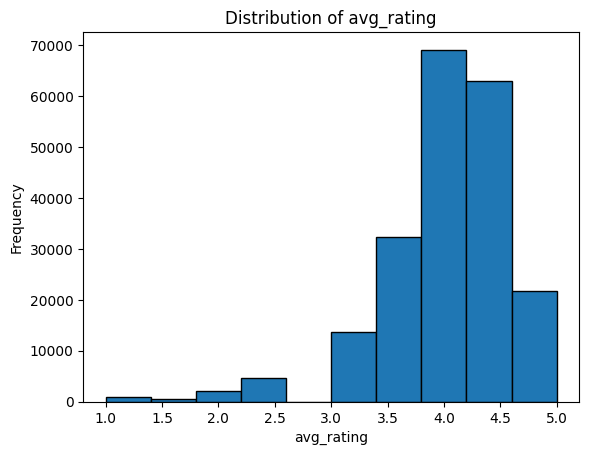

In [156]:
plt.hist(df_italy['avg_rating'].dropna(), bins=10, edgecolor='black')
plt.title('Distribution of avg_rating')
plt.xlabel('avg_rating')
plt.ylabel('Frequency')
plt.show()

In [157]:
df_italy['avg_rating'].describe()

,avg_rating
count,208055.000000
mean,4.038021
std,0.656975
min,1.000000
25%,3.500000
50%,4.000000
75%,4.500000
max,5.000000


###total_reviews_count

In [158]:
df_italy['total_reviews_count'].isnull().sum()/len(df_italy)

np.float64(0.03209603004053158)

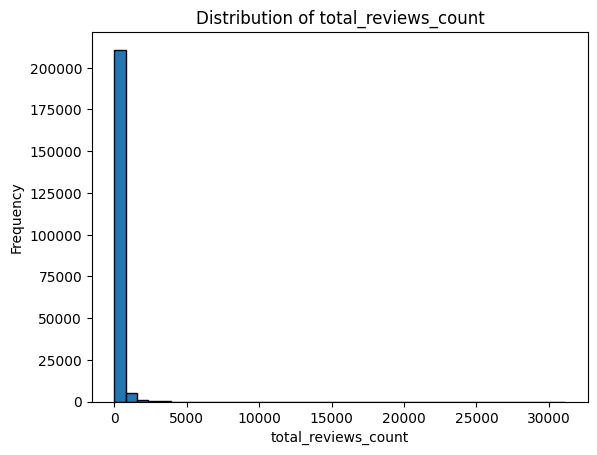

In [159]:
plt.hist(df_italy['total_reviews_count'].dropna(), bins=40, edgecolor='black')
plt.title('Distribution of total_reviews_count')
plt.xlabel('total_reviews_count')
plt.ylabel('Frequency')
plt.show()

In [160]:
df_italy['total_reviews_count'].describe()

,total_reviews_count
count,217549.000000
mean,136.466768
std,331.498014
min,0.000000
25%,8.000000
50%,36.000000
75%,137.000000
max,31144.000000


Due to skewed data and the fact that mean and Q3 are close in value, we will choose target values higher than mean


##Target Definition

In [161]:
df_italy["avg_rating"] = pd.to_numeric(df_italy["avg_rating"], errors="coerce")
df_italy["total_reviews_count"] = pd.to_numeric(df_italy["total_reviews_count"], errors="coerce")
reviews_mean = df_italy["total_reviews_count"].mean(skipna=True)
df_italy["target"] = np.where(
        (df_italy["avg_rating"] >= 4.5) & (df_italy["total_reviews_count"] > reviews_mean), 1, 0
    )
target = "target"
print(f"Created target=1 if avg_rating>=4.5 and total_reviews_count>{reviews_mean:.2f}, else 0.")

Created target=1 if avg_rating>=4.5 and total_reviews_count>136.47, else 0.


In [162]:
df_italy["target"].value_counts()

,count
target,
0,205274
1,19489


In [163]:
df_italy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224763 entries, 0 to 224762
Data columns (total 75 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   restaurant_link                    224763 non-null  string 
 1   restaurant_name                    224763 non-null  string 
 2   original_location                  224763 non-null  object 
 3   country                            224763 non-null  object 
 4   region                             224763 non-null  string 
 5   province                           224763 non-null  string 
 6   city                               224763 non-null  string 
 7   address                            224763 non-null  string 
 8   latitude                           222603 non-null  float64
 9   longitude                          222603 non-null  float64
 10  claimed                            224763 non-null  int64  
 11  awards                             2247

In [164]:
#obj_cols = df_italy.select_dtypes(include=["object"]).columns
#for col in obj_cols:
 # df_italy[col] = df_italy[col].astype("category")

In [165]:
full_dropped_columns=['original_location', 'country', 'province_before_grouping','city_before_grouping',
       'region_before_grouping', 'top_tags',
       'meals', 'features','cuisines',
       'original_open_hours',
        'keywords','min_price']
df_full_dropped_columns= df_italy[full_dropped_columns]

In [166]:
saved_columns=['restaurant_link','restaurant_name', 'top_tags','province_before_grouping','city_before_grouping','region_before_grouping',
       'meals', 'cuisines', 'features', 'original_open_hours', 'keywords'
      ]
df_saved_columns= df_italy[saved_columns]

In [167]:
with open('df_full_dropped_columns.pkl', 'wb') as f:
    pickle.dump(df_full_dropped_columns, f)

print("df_full_dropped_columns dataset saved as a pickle file.")

df_full_dropped_columns dataset saved as a pickle file.


In [168]:
with open('df_saved_columns.pkl', 'wb') as f:
    pickle.dump(df_saved_columns, f)

print("df_saved_columns dataset saved as a pickle file.")

df_saved_columns dataset saved as a pickle file.


In [169]:
df_italy=df_italy.drop(columns=full_dropped_columns)

In [170]:
with open('df_main.pkl', 'wb') as f:
    pickle.dump(df_italy, f)

print("df_main dataset saved as a pickle file.")

df_main dataset saved as a pickle file.
